In [1]:
import EITfunc.EITlook as eit

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cm as cmx
import matplotlib.colorbar as cb
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

import os

from astropy import units as u
from astropy.constants import G
from astropy.io import ascii, fits
from astropy.table import Table
from astropy.timeseries import LombScargle
import astropy.time

import scipy.optimize as sciop
from scipy.stats import mode, binned_statistic

import time

%matplotlib inline
%load_ext autoreload
%autoreload 2

14


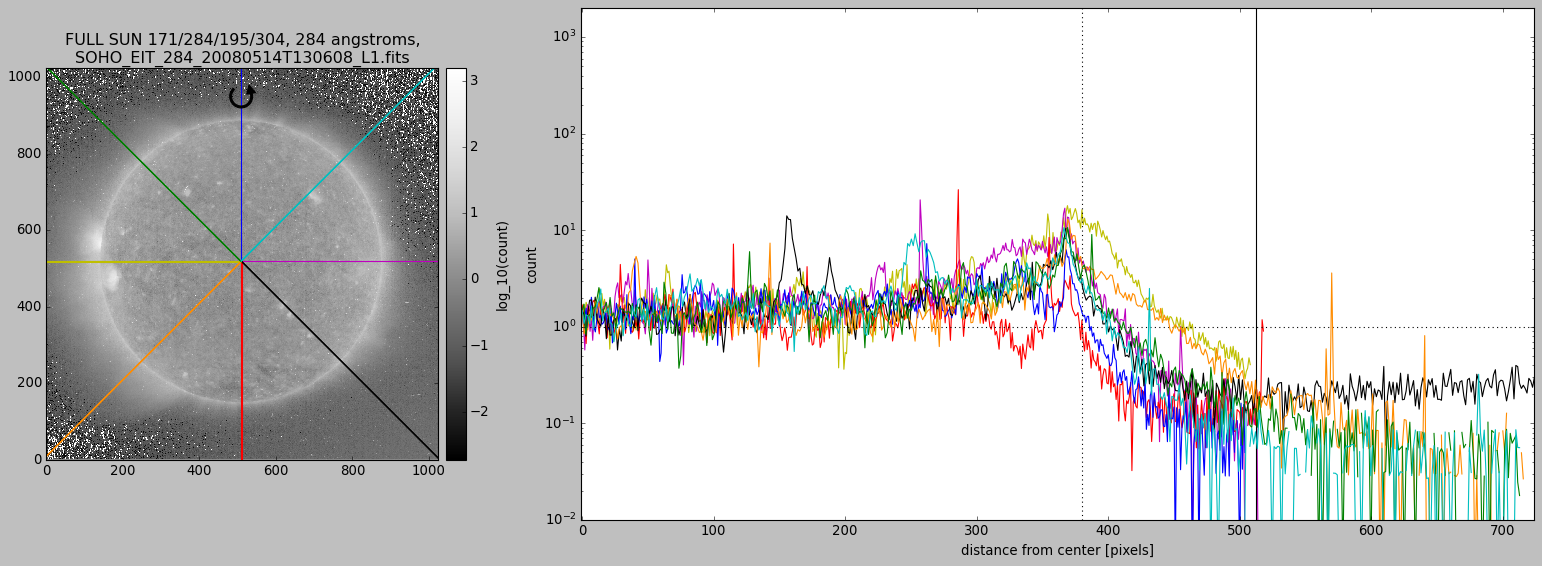

Al +1
False False False


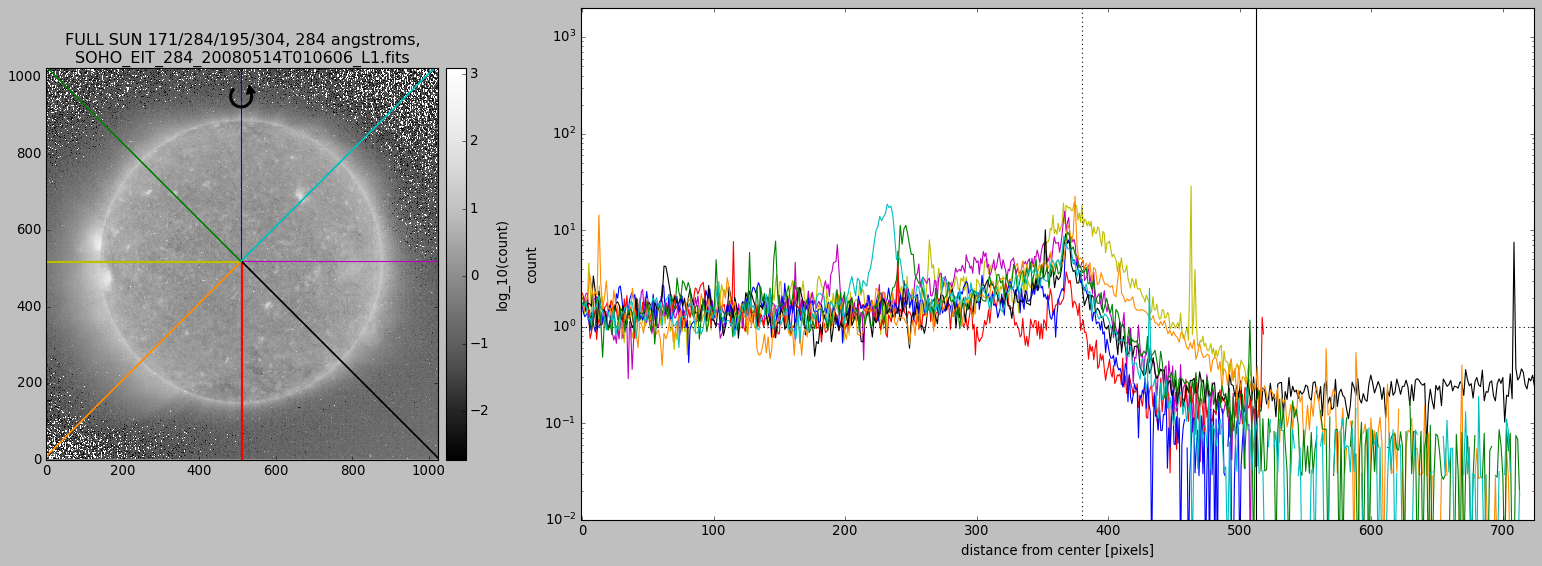

Al +1
False False False
15


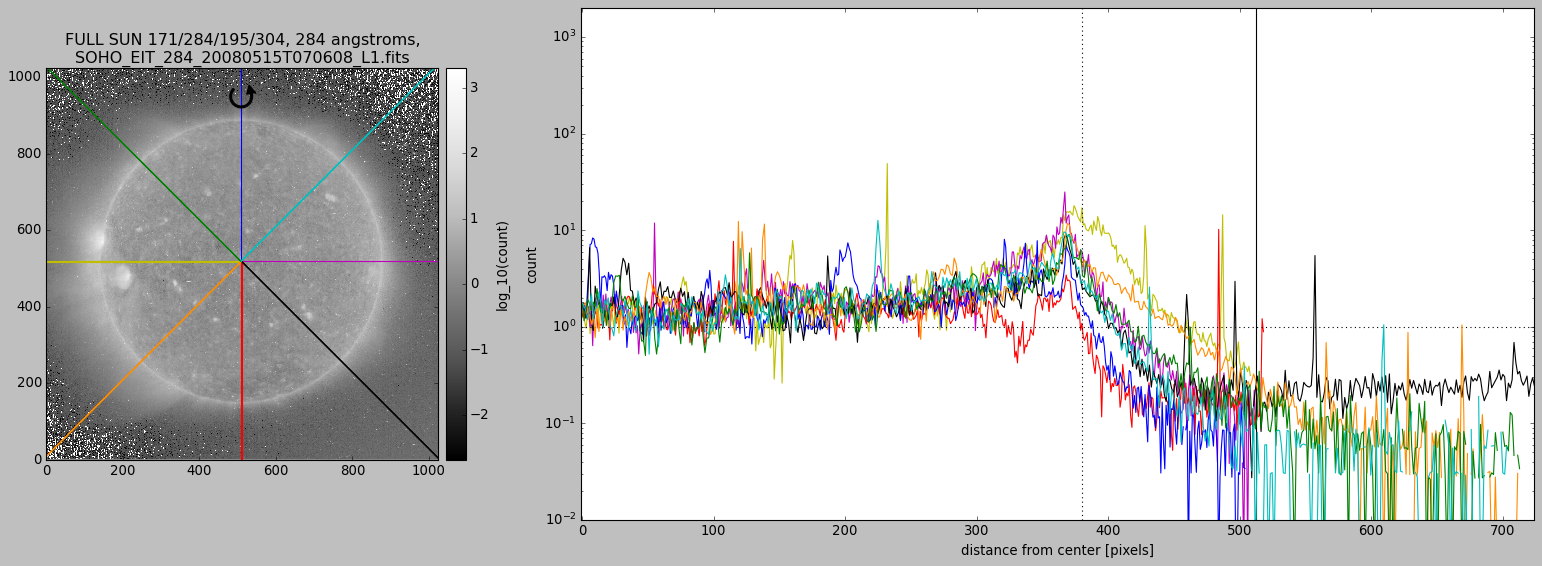

Al +1
False False False


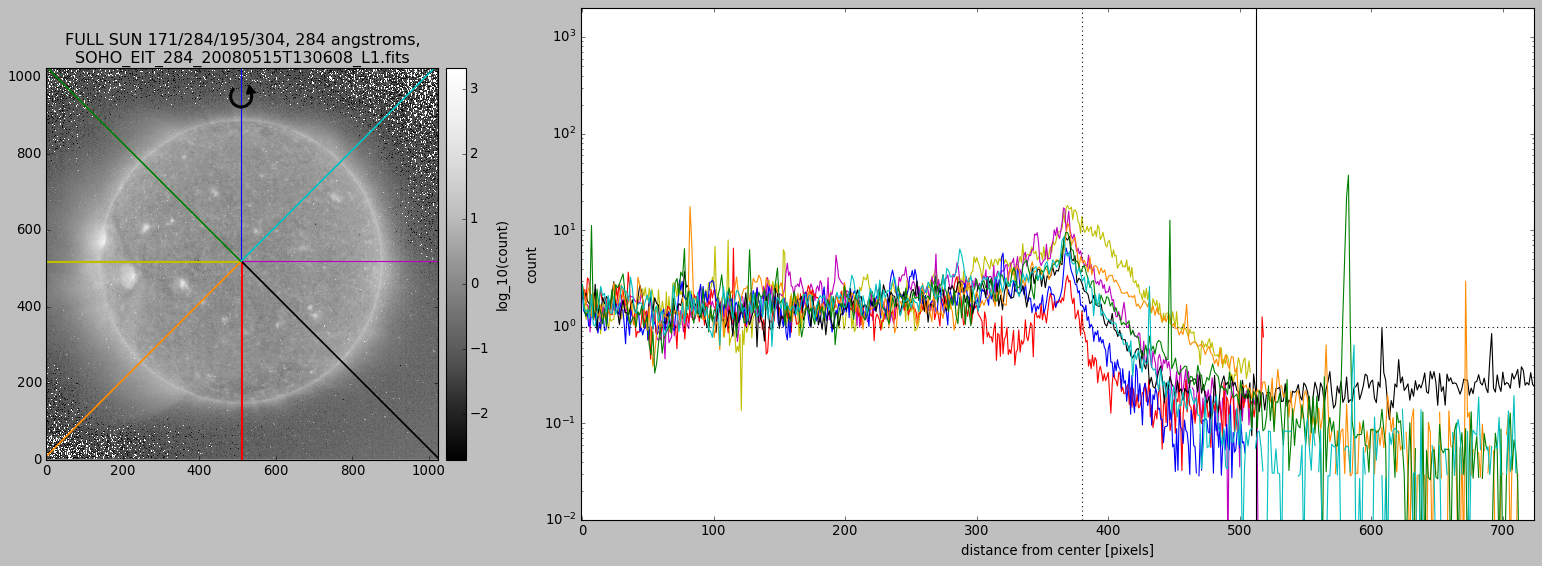

Al +1
False False False


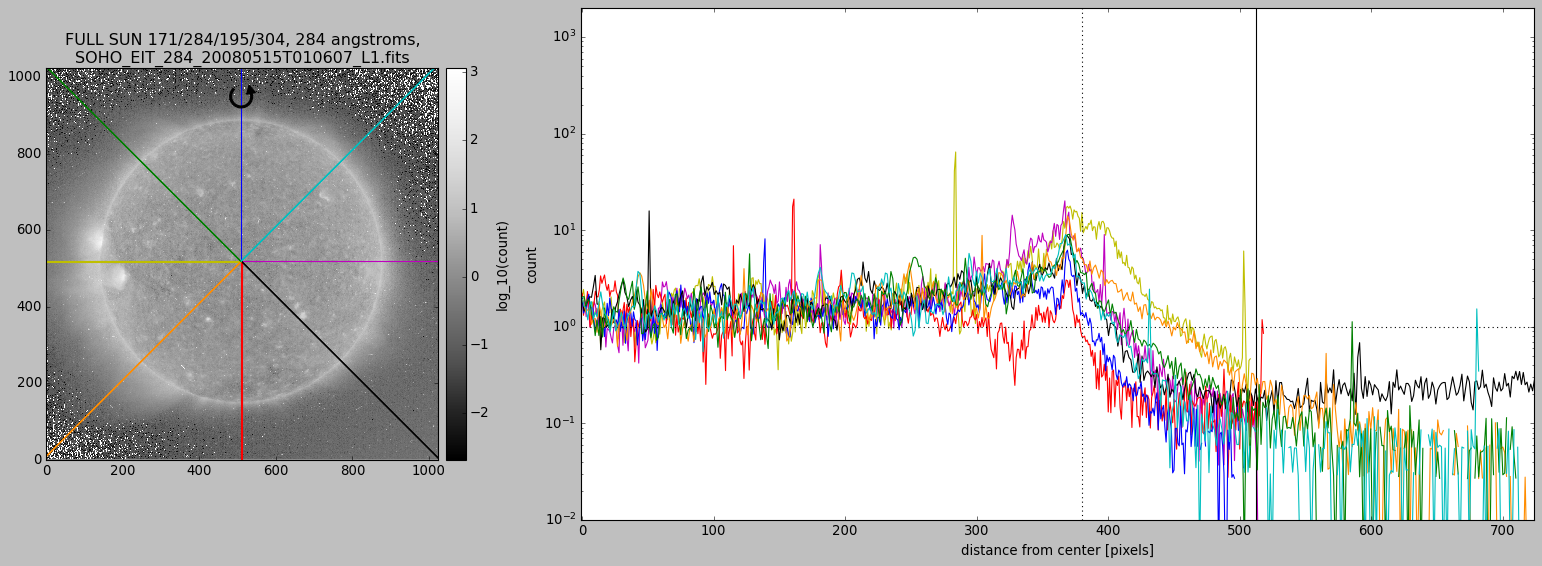

Al +1
False False False
16


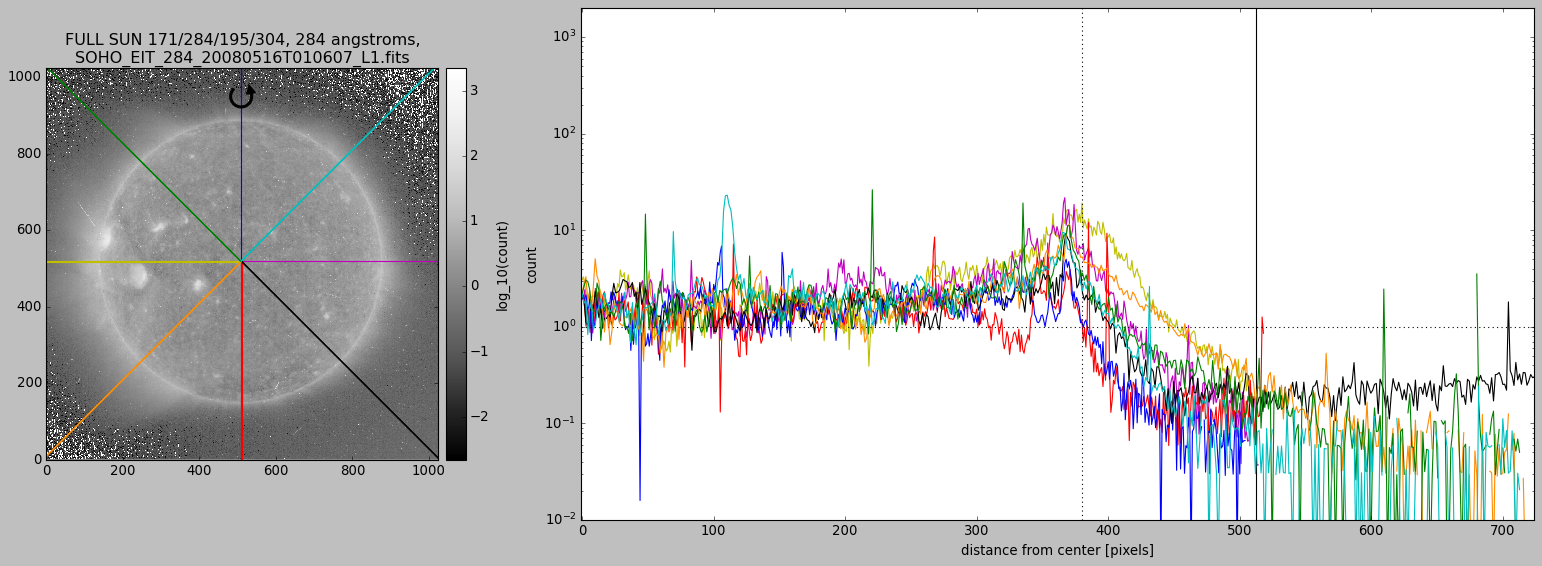

Al +1
False False False


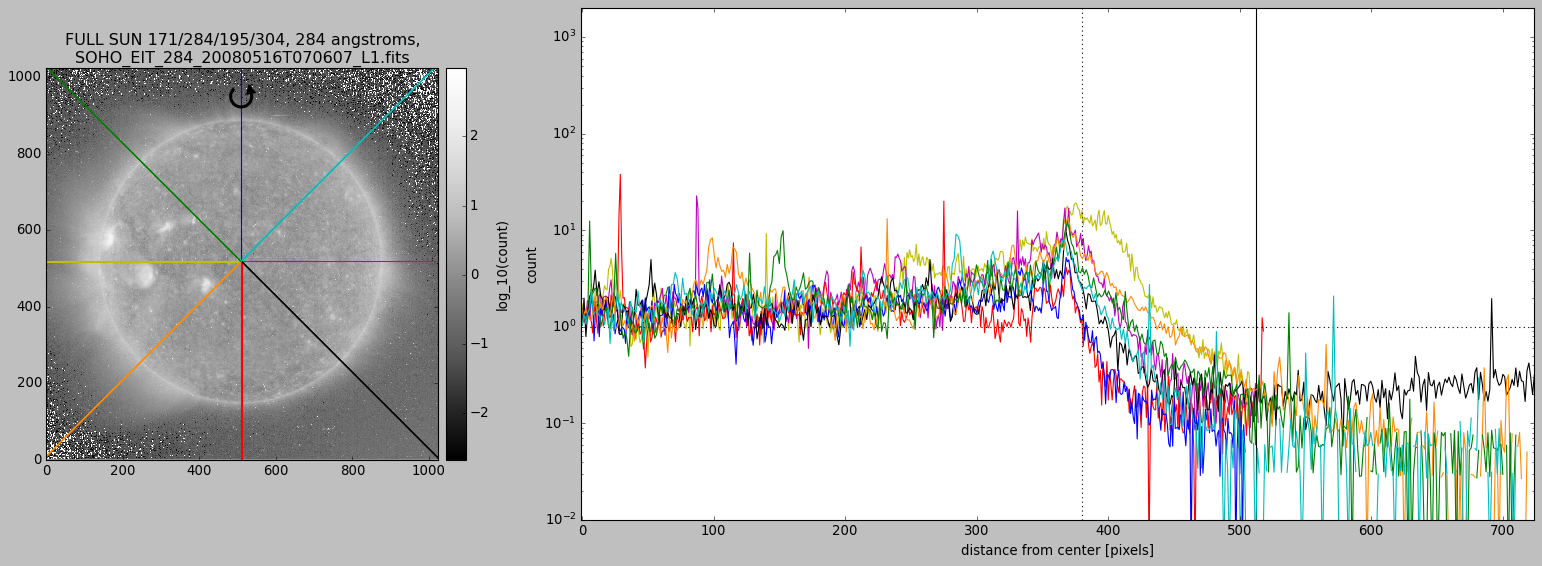

Al +1
False False False
22


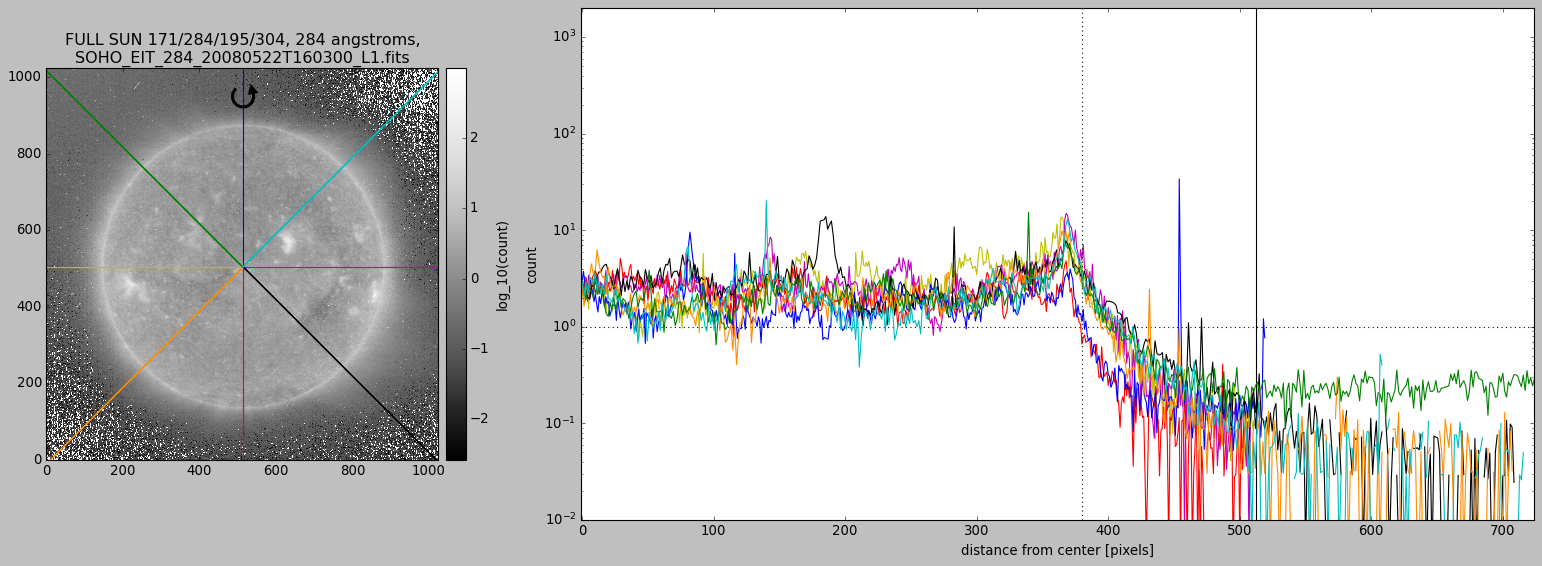

Al +1
False True True
23


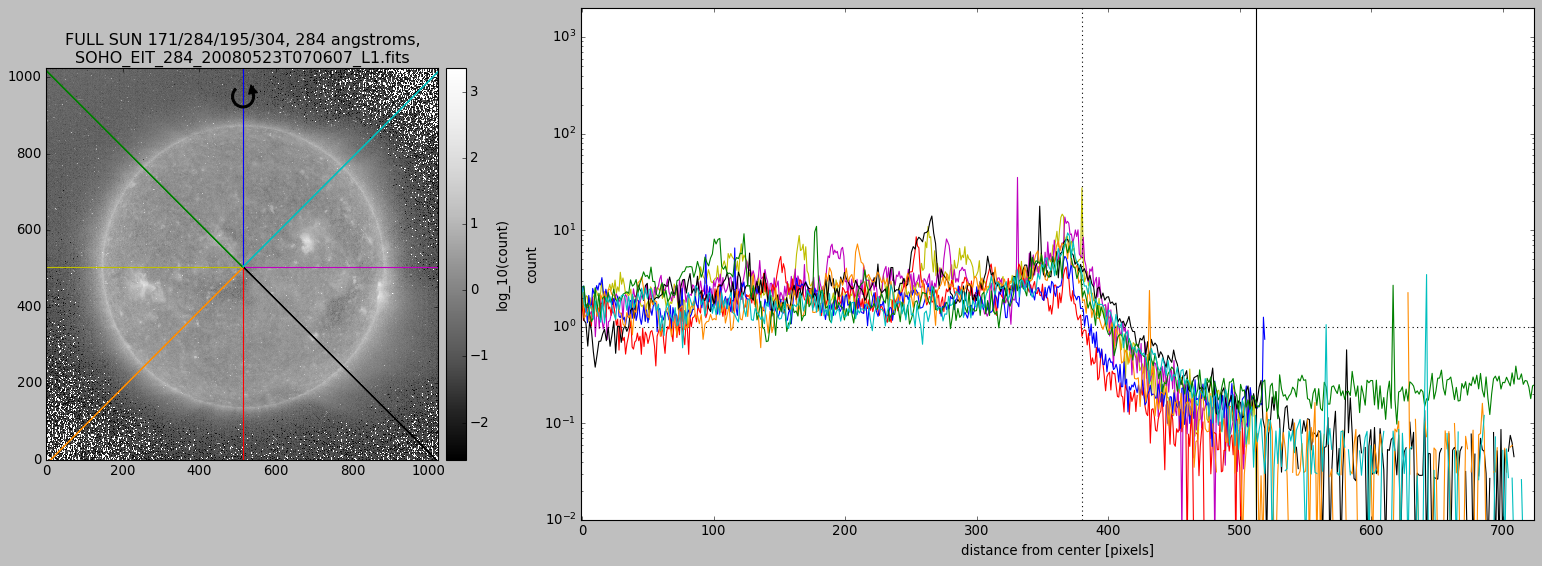

Al +1
False True True


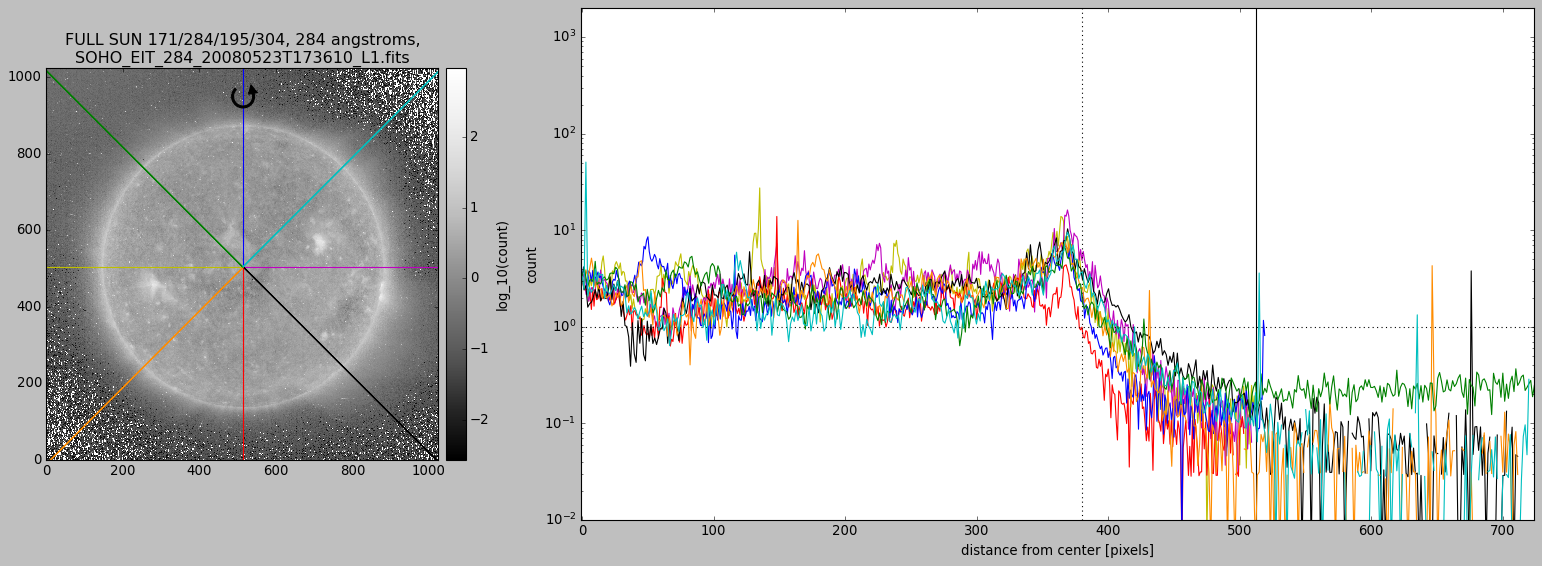

Al +1
False True True


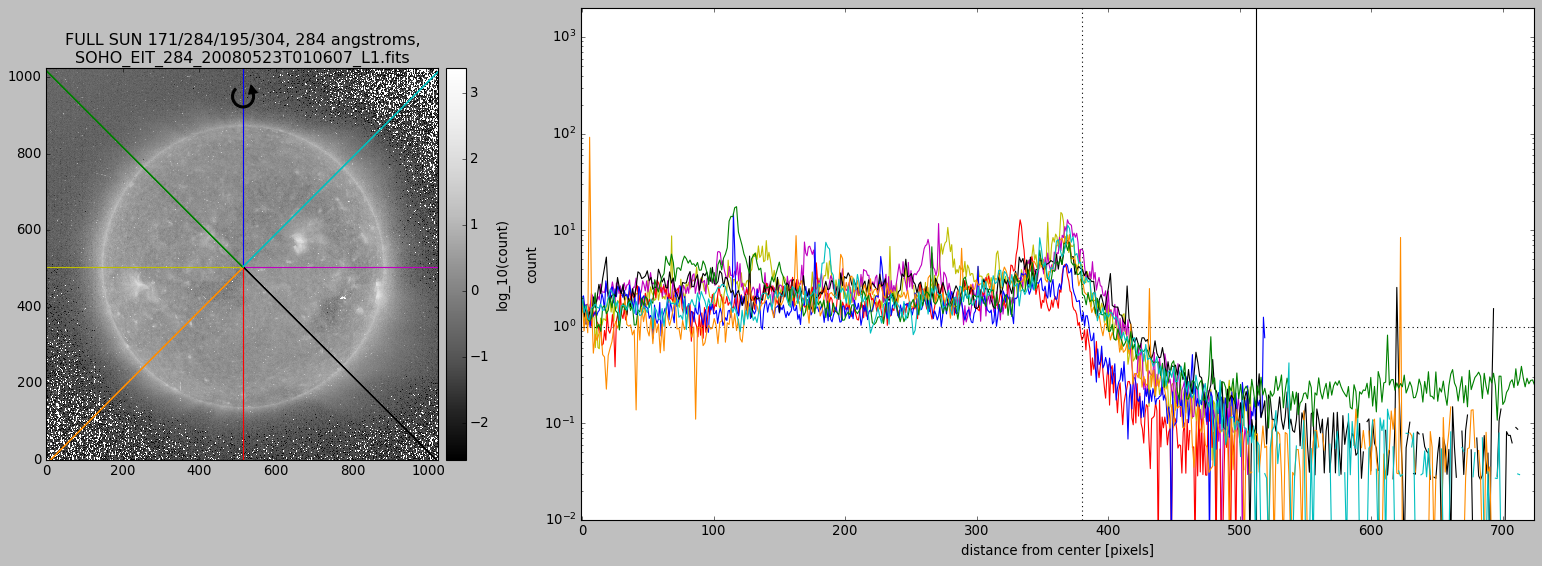

Al +1
False True True
24


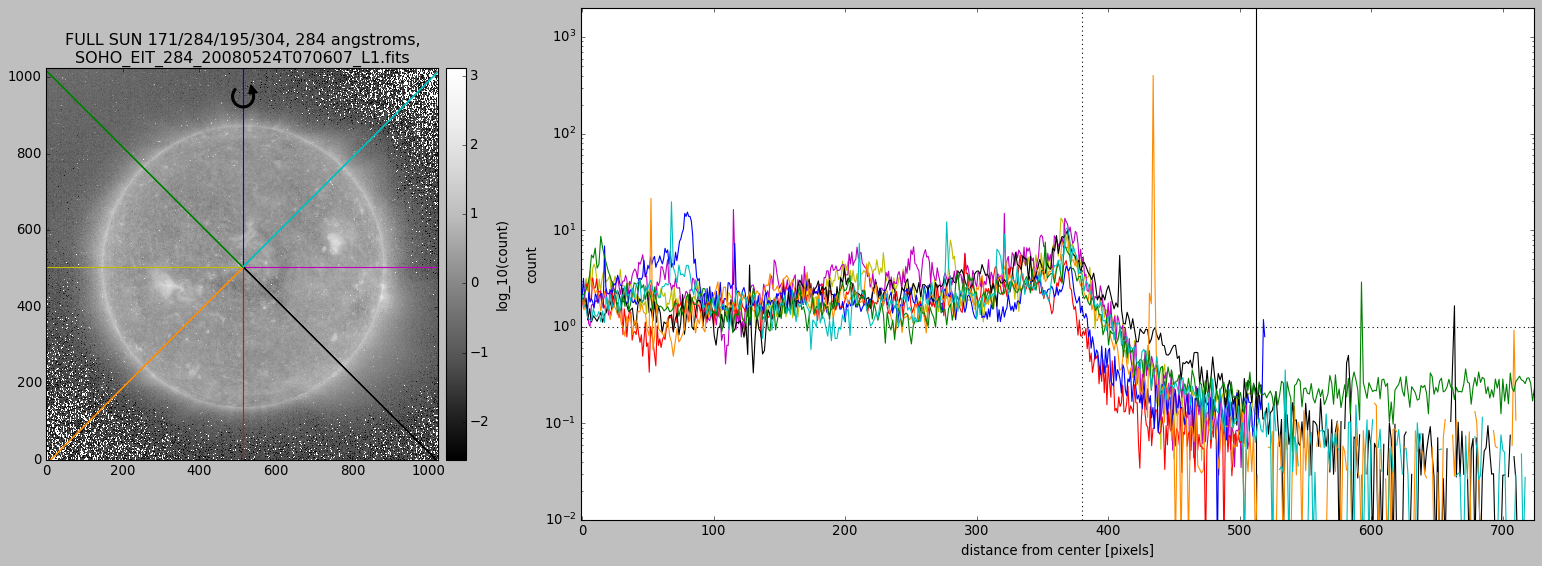

Al +1
False True True


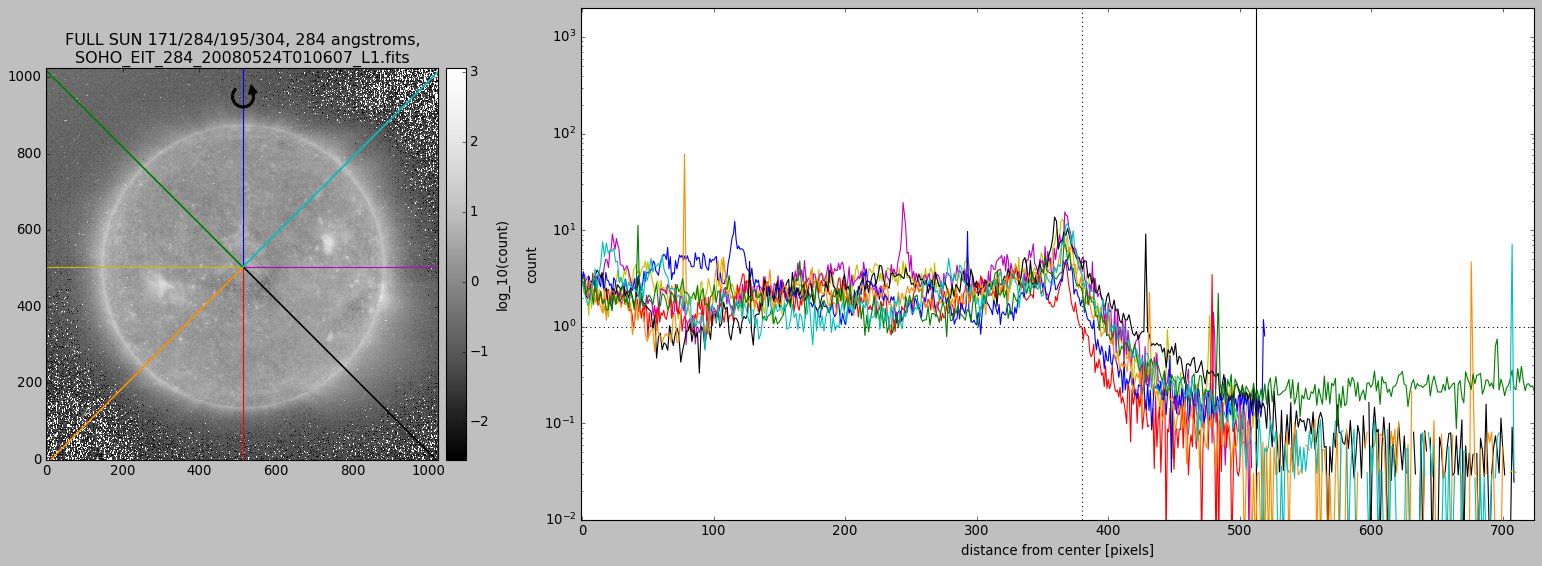

Al +1
False True True


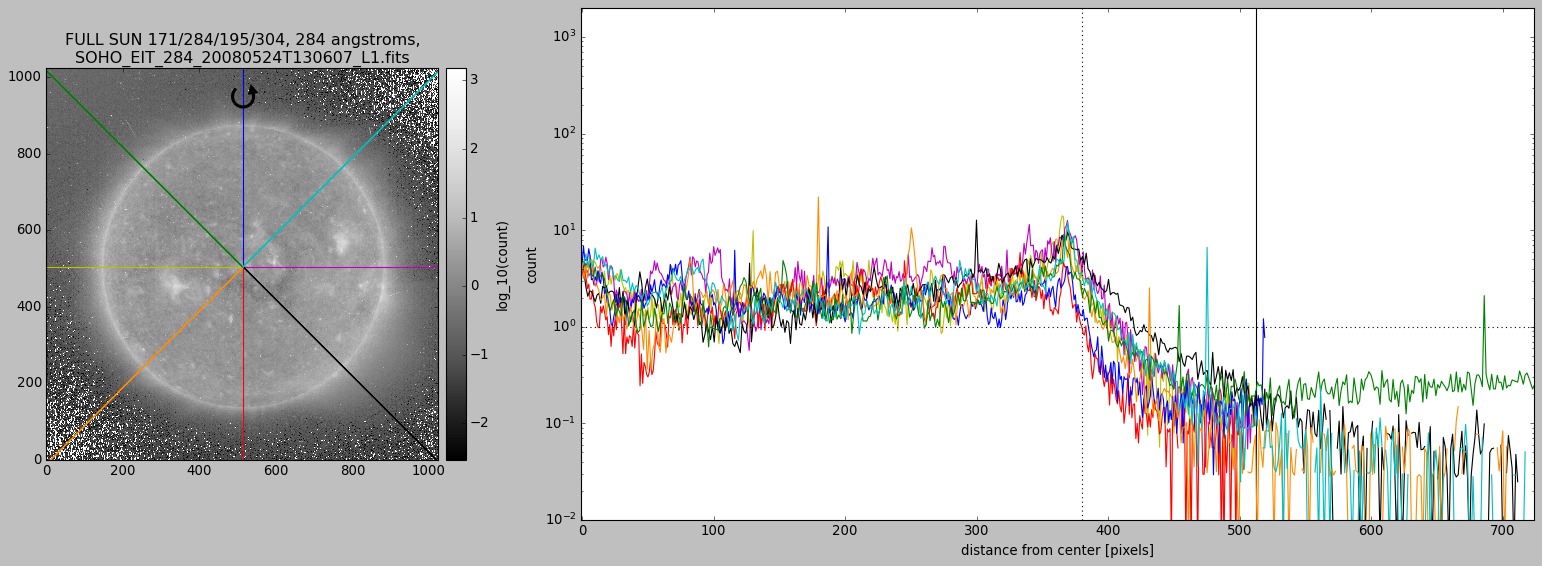

Al +1
False True True


In [12]:
#for year in range(1996, 2010):
for year in [2008]:  
    for m in range(5,6):
        month = str(m).zfill(2)
        days = sorted([int(f.path[-2:]) for f in os.scandir("./EIT/{0}/{1}/".format(year,month)) if f.is_dir()])

        for d in days:
            day = str(d).zfill(2)
            fitsFiles = os.scandir("./EIT/{0}/{1}/{2}/".format(year,month,day))

            print(d)
            for f in fitsFiles:
                #print(f.name)
                hdul = fits.open(f.path)
                header = hdul[0].header
                data = hdul[0].data

                #print(repr(header))
                sci_obj_ = header['SCI_OBJ'].replace("/"," ").replace(" ","_").lower()

    
                if "full_sun" in sci_obj_:

                    if np.shape(data) == (1024,1024) and header['MSBLOCKS'] == 0:
                        # substitute nans for negative numbers
                        data[data <= 0.] = np.nan
                        #print(data[data <= 0.])
            
                        xcenter, ycenter = eit.center_from_header(header)
                        xcenter = int(np.round(xcenter,0))
                        ycenter = int(np.round(ycenter,0))

                        obsdate = header['DATE-BEG'].split("T")[0]
                        obstime = header['DATE-BEG'].split("T")[1].split("Z")[0]
                        wavelength = header['WAVELNTH']

                        eit.plot_full_sun_EIT(f.name, header, data, xcenter=xcenter, ycenter=ycenter)
                        bs1, bs1small, bs2 = eit.detect_pinholes(data)
                        print(header['FILTER'])
                        print(bs1,bs1small,bs2)

                
                hdul.close()
               

In [15]:
#for year in range(1996, 2010):
for year in [2011]:  
    for m in range(12,13):
        month = str(m).zfill(2)
        days = sorted([int(f.path[-2:]) for f in os.scandir("./EIT/{0}/{1}/".format(year,month)) if f.is_dir()])

        for d in days:
            day = str(d).zfill(2)
            fitsFiles = os.scandir("./EIT/{0}/{1}/{2}/".format(year,month,day))

            print(d)
            if True:#d < 5:
                for f in fitsFiles:
                    #print(f.name)
                    hdul = fits.open(f.path)
                    header = hdul[0].header
                    data = hdul[0].data
    
                    #print(repr(header))
                    sci_obj_ = header['SCI_OBJ'].replace("/"," ").replace(" ","_").lower()
    
        
                    if "full_sun" in sci_obj_:
    
                        if np.shape(data) == (1024,1024) and header['MSBLOCKS'] == 0:
                            # substitute nans for negative numbers
                            data[data <= 0.] = np.nan
                            #print(data[data <= 0.])
                
                            xcenter, ycenter = eit.center_from_header(header)
                            xcenter = int(np.round(xcenter,0))
                            ycenter = int(np.round(ycenter,0))
    
                            obsdate = header['DATE-BEG'].split("T")[0]
                            obstime = header['DATE-BEG'].split("T")[1].split("Z")[0]
                            wavelength = header['WAVELNTH']
    
                            #eit.plot_full_sun_EIT(f.name, header, data, xcenter=xcenter, ycenter=ycenter)
                            #bs1, bs1small, bs2 = eit.detect_pinholes(data)
                            print(header['FILTER'])
                            #print(bs1,bs1small,bs2)

                
                hdul.close()
               

1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
2
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
3
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
4
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
5
Al +1
Al +1
Al +1
Al +1
6
Al +1
Al +1
Al +1
Al +1
7
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
8
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
9
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
10
Al +1
Al +1
Al +1
Al +1
11
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
12
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
13
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
14
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
15
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
16
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
17
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
18
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
19
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
20
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
21
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
22
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
Al +1
23
Al +1
Al +1
Al +1
Al +